# Estadística para Ciencia de los Datos - Lección 4

Autor: Saúl Calderón, Juan Esquivel, Yuliana Mora

#Repaso sobre tipos de variables

![](https://drive.google.com/uc?id=1PnmIs8d0rDcFklDdMA8HTTl08CL58YPz)

**Variables nominales**: sus valores no son ordenables, por ejemplo:
  - Sexo
  - Religión
  - País de procendencia
  
**Variables Ordinales**: los valores son ordenables pero no hay una noción de distancia consistente entre cada uno de sus valores, por ejemplo:
 - Orden de finalización de una carrera
 - Grado de acuerdo o desacuerdo con una política

**Variables de escala de intervalo (intervalos)**: los valores son numéricos y las distancias entre cada valor tienen un significado consistente, por lo que las operaciones de suma y resta tienen sentido, por ejemplo:
 - Temperatura en grados celsius
 - Año del calendario

**Variables de escala de razón (razones)**: tienen las mismas propiedades de los intervalos y adicionalemente el concepto de cero, que indica la **ausencia** de la cantidad medida. Algunos ejemplos son:
 - Cantidad de monedas
 - Distancia
 - Tensión eléctrica
 - Aceleración


# Distribuciones de probabilidad
Si bien es  cierto la distribución normal es referente y de utilidad significativa en múltiples ámbitos de la probabilidad, es necesario también estudiar otras distribuciones que modelan otro tipo de fenómenos.

En las siguientes secciones abordaremos algunas de las distribuciones de probabilidad de mayor interés.

##Uniforme discreta
Está distribución modela la probabilidad de un conjunto finito de clases que pueden generarse por una variable aleatoria $X$.  Se dice que $X$ tiene una distribución *uniforme discreta* si cada uno de los valores que puede generar tienen la misma probabilidad de ser generados:

\begin{equation}
p(x_i) = \dfrac{1}{n}, i \in \{1, 2, ..., n\}
\end{equation}

Por ejemplo, esta distribución modela los resultados obtenidos de una variable aleatoria que representa un dado de 6 caras. El valor esperado que retornará la variable $X$, en este caso está dado por:

\begin{equation}
\mu=\displaystyle\sum_{i=1}^n x_ip(x_i)=1*\dfrac{1}{6}+2*\dfrac{1}{6}+3*\dfrac{1}{6}+4*\dfrac{1}{6}+5*\dfrac{1}{6}+6*\dfrac{1}{6}=3.5=\dfrac{n+1}{2}
\end{equation}

Y la varianza para $X$ viene dada por:

\begin{equation}
\sigma^2=\dfrac{1}{n}\displaystyle\sum_{i=1}^nx_i^{2}-\left(\dfrac{n+1}{2} \right)^{2}=\dfrac{1}{n}\dfrac{n(n+1)(2n+1)}{6}-\left(\dfrac{n+1}{2} \right)^{2}=\dfrac{n^2-1}{12}
\end{equation}


En este caso:

\begin{equation}
\sigma^2=\dfrac{6^2-1}{12}=\dfrac{36-1}{12}\approx2.9
\end{equation}




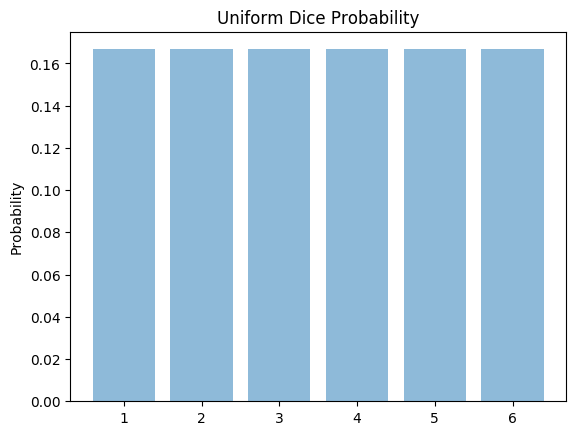

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

dice = [1, 2, 3, 4, 5, 6]
probability = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]


plt.bar(dice, probability, align='center', alpha=0.5)
plt.ylabel('Probability')
plt.title('Uniform Dice Probability')

plt.show()

##Uniforme continua

La función de densidad de una variable aleatoria continua $X$ uniformemente distribuida en el intervalo $\mathbb{[a,b]}$, esta dada por:


\\
\begin{equation}
f(x)=\left\lbrace
\begin{array}{ll}
\dfrac{1}{b-a}&a \leq x \leq b\\
\\
 0& \text{cualquier otro punto}
\end{array}
\right.
\end{equation}


Los valores $a$ y $b$ son los parámetros de la función de densidad uniforme.

La esperanza y varianza de $X$ son respectivamente:


\begin{equation}
\mu=\dfrac{a+b}{2}
\end{equation}


\begin{equation}
\sigma^2=\dfrac{(b-a)^2}{12}
\end{equation}



## Binomial
La distribución binomial se basa en eventos que solo tienen dos posibles resultados: éxito o fracaso.

El ejemplo más típico de este tipo de evento es el tirar una moneda al aire, donde sólo puede caer una cara de la moneda. Cada uno de estos eventos se le llama una *prueba de Bernoulli* o *ensayo de Bernoulli*



Un experimento binomial normalmente posee las siguientes características:

- Consiste en un número fijo, $n$, de pruebas idénticas.
- Cada prueba resulta en uno de dos resultados: éxito o fracaso.
- Las pruebas son independientes.
- La probabilidad de éxito en una sola prueba es igual a  $p$ y es el mismo de una prueba a otra. La probabilidad de fracaso es igual a $q=(1-p)$. Se puede describir ambas probabilidades con un único parámetro.
- La variable aleatoria de interés $X$, es discreta y describe el número de pruebas exitosas observado durante las $n$ pruebas.



Nótese que los eventos que se pueden modelar no requieren tener sólo dos valores explícitamente, sino que se pueden agrupar en 2 categorías. Por ejemplo, en un examen de selección múltiple con $n$ opciones, lo importante es modelar si la respuesta es correcta o no (no la cantidad de opciones).



### Combinatoria
Antes de abordar la fórmula de variables aleatorias binomiales es importante recordar la notación combinatoria, que facilita expresar la manera en que se pueden crear combinaciones de diferentes eventos.

Por ejemplo, podemos considerar las diferentes maneras de combinar 2 de los 3 colores primarios aditivos: rojo, verde y azul (RGB, por siglas en inglés). Las siguientes son las permutaciones disponibles:

- RG
- RB
- GR
- GB
- BR
- BG

Sin embargo, suponiendo que el orden no nos interesa, podemos eliminar las combinaciones duplicadas, obteniendo un total de 3 posibilidades: RB, RG  y GB.

La notación combinatoria captura este tipo de planteamiento expresando de un total de $n$ posibilidades la escogencia de $x$ valores:

\begin{equation}
{n \choose x} = \dfrac{n!}{x!(n-x)!}
\end{equation}

En el caso del ejemplo:

\begin{equation}
{3 \choose 2} = \dfrac{3!}{2!(3-2)!}=\dfrac{3 \cdot 2 \cdot 1}{(2 \cdot 1)\cdot 1}= 3
\end{equation}

En el caso de la variable aleatoria que queremos modelar nos interesa saber cuántas pruebas fueron exitosas de un total máximo dado por los parámetros de la distribución.

### Función de probabilidad
La variable aleatoria $X$ equivale al número de pruebas exitosas que ocurrieron dados dos parámetros:

- La probabilidad $p$ de éxito
- La cantidad $n$ de pruebas que se permiten

Intuitivamente, estamos tratando de modelar de cuántas diferentes maneras se podrían dar las pruebas de forma que tengamos $x$ éxitos, de un total de $n$.

\begin{equation}
p(x) = {n \choose x} p^x(1-p)^{n-x},\quad x=0,1,\ldots,n,\quad 0\leq p \leq 1
\end{equation}

La esperanza y varianza están dadas únicamente por los dos parámetros $n$ y $p$

\begin{equation}
\mu=\mathrm{E}(X)=np
\end{equation}

\begin{equation}
\sigma^2=\mathrm{Var}(X)=np(1-p)
\end{equation}



![](https://drive.google.com/uc?export=view&id=1DdXEdZ_roRKHdAhZWc_xCHnKHJ8YQlHy)

Aplicaciones:

- Muestreo de defectos en control de calidad industrial

- Eficacia de un tratamiento en la cura de una enfermedad

## Geométrica

Esta distribución comparte algunas características de un experimento binomial. Comprende pruebas idénticas e independientes, con dos posibles resultados: éxito o fracaso y probabilidad de éxito $p$ constante de una prueba a otra.


No obstante, ahora la variable aleatoria $X$ es el número de pruebas para que ocurra el primer éxito, es decir, $p(x)$cuantifica la probabilidad de que se deban realizar exactamente $x$ pruebas para encontrar la primera ocurrencia del evento.


Por ejemplo, si decimos que para el evento de obtener escudo en una moneda queremos medir $p(x=5)$ implica que queremos saber cual es la probabilidad de que los primeros cuatro tiros hayan sido corona y el quinto sea escudo.

Esto quiere decir que si un evento tiene un $p$ cercano a 1, es poco probable que haya que repetir la prueba muchas veces para poder obtenerlo.

![](https://drive.google.com/uc?export=view&id=1uFeguJfVFnPSTz3A_W0Pf8njuPN8-4JH)

![](https://drive.google.com/uc?id=1iZvlPZF6Pdk9J82vrCiCzxyZH0S-QhpE)

Entonces la función de densidad para una variable aleatoria discreta $X$ distribuida geométricamente está dada por la siguiente expresión:

\begin{equation}
p(x)=(1-p)^{x-1}p,\quad x=1,2,\ldots, \quad 0\leq p \leq 1
\end{equation}

La media y varianza están dadas por:

\begin{equation}
\mu=\mathrm{E}(X)=\dfrac{1}{p}
\end{equation}

\begin{equation}
\sigma^2=\mathrm{Var}(X)=\dfrac{1-p}{p^2}
\end{equation}

Analizando la fórmula de $\mathrm{E}(X)$, se observa que los valores más grandes de $p$ llevan a probabilidades más altas para los valores más pequeños de $X$ y en consecuencia, a menores probabilidades para los valores más grandes de $X$. De esta forma, el valor medio de $X$ es inversamente proporcional a $p$.


La distribución de probabilidad geométrica se usa con frecuencia para modelar distribuciones de la duración de tiempos de espera. Por ejemplo, suponga que el motor de un avión comercial recibe atención periódicamente para cambiar sus diversas partes en diferentes instantes de tiempo y por lo tanto, las vidas útiles de sus componentes varían. Entonces la probabilidad $p$ de mal funcionamiento del motor durante cualquier intervalo de operación de una hora observado al azar podría ser el mismo que para cualquier otro intervalo de una hora. El tiempo
transcurrido antes de que el motor falle es el número de intervalos de una hora, $X$, hasta que
ocurra la primera falla.

(Para esta aplicación, el mal funcionamiento del motor en un periodo
determinado de una hora se define como éxito. Observe que como en el caso del experimento
binomial, cualquiera de los dos resultados de una prueba se puede definir como éxito. Por lo tanto, en este contexto un "éxito" no es necesariamente lo que podría considerarse como "bueno" en nuestra
conversación de todos los días.)

## Poisson
La distribución de Poisson brinda un buen modelo para la distribución de probabilidad del número $X$ de nuevos elementos o eventos que ocurren en un intervalo definido de tiempo o espacio. Por ejemplo, sirve para describir la probabilidad de llegada de nuevos clientes a una cola en un intervalo de tiempo o la probabilidad de un accidente automovilístico en un tramo de carretera durante una semana.

Poisson trata de medir cuantas ocurrencias de un evento se dan por segmento.En el caso práctico humano, esta distribución permite conocer *cual es la probabilidad de que llegue un cliente a la fila del banco en los próximos 5 minutos*. En este caso, se trata de cuantos clientes por unidad de tiempo. Sin embargo, cualquier relación de conteo con unidades puede modelarse.

La probabilidad de ocurrencia de que llegue un nuevo cliente a la fila en 5 minutos puede denotarse como $p$ y para fines prácticos:

- $p$ es la misma en en cualquiera de los intervalos y es proporcional al largo del segmento.

- El total de eventos en cada segmento es independiente de otros segmentos.


La distribución Poisson está dada por un único parámetro $\lambda> 0$ que determina su forma. La variable aleatoria $X$ se interpreta como el número de eventos en el intervalo.

\begin{equation}
p(x)=\dfrac{\lambda^x}{x!}e^{-\lambda} \space \space x=0, 1, 2,\ldots \space \lambda>0
\end{equation}

y su esperanza y varianza son:


\begin{equation}
\mu=\mathrm{E}(X)= \lambda
\end{equation}

\begin{equation}
\sigma^2=\mathrm{Var}(X)=\lambda
\end{equation}

![](https://drive.google.com/uc?export=view&id=14BF2tsY91EJ_yQDlSbGSywG0RK-XnQTN)




### Ejercicio

Cierto tipo de árbol tiene plantas que han crecido de semillas dispersas al azar en una superficie grande, con la densidad media de plantas siendo aproximadamente de cinco por metro cuadrado. Si en esa zona un guardabosques localiza al azar diez regiones de muestreo de 1 metro cuadrado, encuentre la probabilidad de que ninguna de las regiones contenga plantas que hayan crecido de semillas.

## Exponencial

La manera en que abordamos los procesos de Poisson en la sección anterior muestran una *ausencia de memoria* al medir cuando pasa un evento o no, con respecto a las ocurrencias anteriores. Por ejemplo, Poisson mide cuantas personas pueden llegar a un banco en los próximos 5 minutos, pero no toma consideraciones con respecto a si ya han llegado clientes en los 10 minutos anteriores.

La distribución exponencial es utilizada para determinar la probabilidad de que en cierto tiempo suceda un determinado evento. Formalmente, si una variable aleatoria continua  $X$ se distribuye exponencialmente, es definida como la **distancia (tiempo) entre eventos** de un proceso Poisson (proceso en el cual los eventos ocurren de forma continua e independiente y a una tasa promedio constante). La función de densidad exponencial está dada por la siguiente ecuación:

\\
\begin{equation}
f(x)=\left\lbrace
\begin{array}{ll}
\\ \lambda\space e^{-\lambda x}   &x \geq 0, \space \lambda \geq 0\\
\\
 0& \text{cualquier otro punto}
\end{array}
\right.
\end{equation}


Donde $\lambda$ es el inverso de la duración esperada entre eventos y representa un parámetro de intensidad del proceso.

La esperanza y varianza están dadas por:

\begin{equation}
\mu=\mathrm{E}(X)= \dfrac{1}{\lambda}
\end{equation}

\begin{equation}
\sigma^2=\mathrm{Var}(X)=\dfrac{1}{\lambda^2}
\end{equation}


La función de distribución exponencial es un caso particular de la función de distribución gamma que veremos en la siguiente sección.




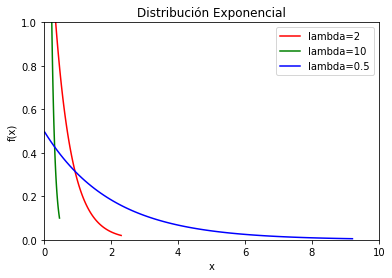

In [ ]:
# Graficando Exponencial
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np


#distribución exponencial con lambda=2
lambdaValue = 2
exponencial1 = stats.expon(scale=1/lambdaValue)
x1= np.linspace(exponencial1.ppf(0.01),
                exponencial1.ppf(0.99), 100)
fp1 = exponencial1.pdf(x1) # Función de Probabilidad


#distribución exponencial con lambda=10
lambdaValue = 10
exponencial2 = stats.expon(scale=1/lambdaValue)
x2 = np.linspace(exponencial2.ppf(0.01),
                exponencial2.ppf(0.99), 100)
fp2 = exponencial2.pdf(x2) # Función de Probabilidad

#distribución exponencial con lambda=0.5
lambdaValue = 0.5
exponencial3 = stats.expon(scale=1/lambdaValue)
x3 = np.linspace(exponencial3.ppf(0.01),
                exponencial3.ppf(0.99), 100)
fp3 = exponencial3.pdf(x3) # Función de Probabilidad


plt.plot(x1, fp1, color="red", label="lambda=2")
plt.plot(x2, fp2, color="green", label="lambda=10")
plt.plot(x3, fp3, color="blue",label="lambda=0.5")
plt.xlim(0, 10)
plt.ylim(0, 1) #0.8
plt.legend(("lambda=2","lambda=10", "lambda=0.5"),prop = {'size':10}, loc = 'upper right')


plt.title('Distribución Exponencial')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()





## Gamma

La distribución Gamma es adecuada para modelar el comportamiento de variables aleatorias continuas con asimétrica positiva, es decir, variables que presentan una mayor probabilidad de ocurrencia de eventos a la izquierda de la media que a la derecha. Esto es, casi toda el área bajo la
función de densidad está ubicada cerca del origen y la función de densidad cae gradualmente
conforme y aumenta. La distribución Gamma también es útil para modelar eventos que involucren el tiempo.

Una variable aleatoria continua $X$ tiene una distribución Gamma si su función de densidad está expresada como:

\\
\begin{equation}
f(x)=\left\lbrace
\begin{array}{ll}
\dfrac{x^{\alpha-1}e^{{-x}/{\beta}}}{\beta^\alpha\Gamma(\alpha)},  & x \geq 0, \space \alpha>0, \space \beta>0
\\
 0& \text{cualquier otro punto}
\end{array}
\right.
\end{equation}


Donde:


\begin{equation}
\Gamma(\alpha)=\int_0^{\infty} x^{\alpha-1}e^{-x}dx
\end{equation}

La función $\Gamma(\alpha)$ se conoce como función gamma. La integración directa verifica que $\Gamma(1)=1$ y la integración por partes nos da un resultado que equivale al factorial continuo, cuando $\alpha$ es positivo

\begin{align}
\Gamma(\alpha)&=(\alpha-1)\Gamma(\alpha-1)
\\&=(\alpha-1)!
\end{align}

 $\alpha$ es un *parámetro de forma* y $\beta$ es un *parámetro de escala*.

Cuando $\alpha=1$, $f(x)$ es ídentica a una distribución Exponencial.


Dada $f(x)$ la esperanza y varianza de $X$ son:

\begin{equation}
\mu=\mathrm{E}(X)= \alpha\beta
\end{equation}

\begin{equation}
\sigma^2=\mathrm{Var}(X)=\alpha\beta^2
\end{equation}

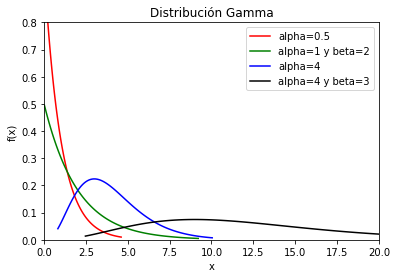

In [ ]:
# Graficando Gamma
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


#distribución gamma con alpha=1 y beta=1
gamma1 = stats.gamma(1)
x1= np.linspace(gamma1.ppf(0.01),
                gamma1.ppf(0.99), 100)
fp1 = gamma1.pdf(x1) # Función de Probabilidad


#distribución gammal con alpha=1 y beta=2
gamma2 = stats.gamma(1,scale=2)
x2= np.linspace(gamma2.ppf(0.01),
                gamma2.ppf(0.99), 100)
fp2 = gamma2.pdf(x2) # Función de Probabilidad


#distribución gamma con alpha=4 y beta=1
gamma3 = stats.gamma(4)
x3 = np.linspace(gamma3.ppf(0.01),
                gamma3.ppf(0.99), 100)
fp3 = gamma3.pdf(x3) # Función de Probabilidad


#distribución exponencial con alpha=4  y beta=3
gamma4 = stats.gamma(a=4,scale=3)
x4 = np.linspace(gamma4.ppf(0.01),
                gamma4.ppf(0.99), 100)
fp4 = gamma4.pdf(x4) # Función de Probabilidad


plt.plot(x1, fp1, color="red", label="alpha=1")
plt.plot(x2, fp2, color="green", label="alpha=2")
plt.plot(x3, fp3, color="blue", label="alpha=4")
plt.plot(x4, fp4, color="black", label="alpha=4 y beta=3")

plt.xlim(0, 20) #0,10
plt.ylim(0, 0.8) #0, 0.8
plt.legend(("alpha=0.5","alpha=1 y beta=2", "alpha=4","alpha=4 y beta=3"),prop = {'size':10}, loc = 'upper right')


plt.title('Distribución Gamma')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

#Siempre que alpha (el parámetro de forma) sea menor que 1
#la distribución Gamma será asintótica al eje y. Conforme se incrementa
#el valor de alpha el gráfico se verá más disperso y con una menor
#inclinación